In [5]:
df = pd.read_csv('STN1.csv')
df.head()


,DATE,FIRECOUNT,WD,RH,WS,AT,GSDP,GSVA,GSDP_CAP,HDI,PM10,PM25,CO,NO2,SO2
0,01-09-2012,1,145.88,66.12,0.3,30.49,391388,342588.0,225117,0.713,NaN,114.62,1.84,96.74,24.74
1,02-09-2012,1,145.34,76.03,0.3,27.55,391388,342588.0,225117,0.713,NaN,131.78,1.63,98.00,11.47
2,03-09-2012,1,100.51,71.75,0.3,27.73,391388,342588.0,225117,0.713,NaN,33.57,0.86,51.49,8.96
3,04-09-2012,1,85.88,71.89,0.3,27.76,391388,342588.0,225117,0.713,NaN,44.01,1.38,55.36,8.63
4,05-09-2012,6,87.98,65.94,0.3,28.43,391388,342588.0,225117,0.713,NaN,28.14,1.11,45.59,8.64


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\goelk\AppData\Local\Temp\ipykernel_34232\1199386948.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\stubble buring\stubble\STN1.csv')


Cleaned Data Preview:
     FIRECOUNT      WD     RH    WS     AT    GSDP      GSVA  GSDP_CAP    HDI  \
147         44  236.92  69.54  0.58  27.15  616085  531175.0    326005  0.729   
148          9  205.53  80.83  0.44  23.95  616085  531175.0    326005  0.729   
149         24  261.82  59.35  0.54  28.93  616085  531175.0    326005  0.729   
150         30  187.98  65.88  0.90  28.76  616085  531175.0    326005  0.729   
151         85  239.77  66.48  0.65  28.48  616085  531175.0    326005  0.729   

       PM10    PM25    CO    NO2    SO2  
147  325.61  107.42  1.48  65.12   9.48  
148  190.52   64.54  1.52  51.20  11.32  
149  431.46  112.76  1.73  90.92   9.25  
150  266.94  108.11  1.68  59.56   7.81  
151  348.74  109.29  1.87  71.82  11.38  

Pearson Correlation Coefficients with FIRECOUNT:
correlations


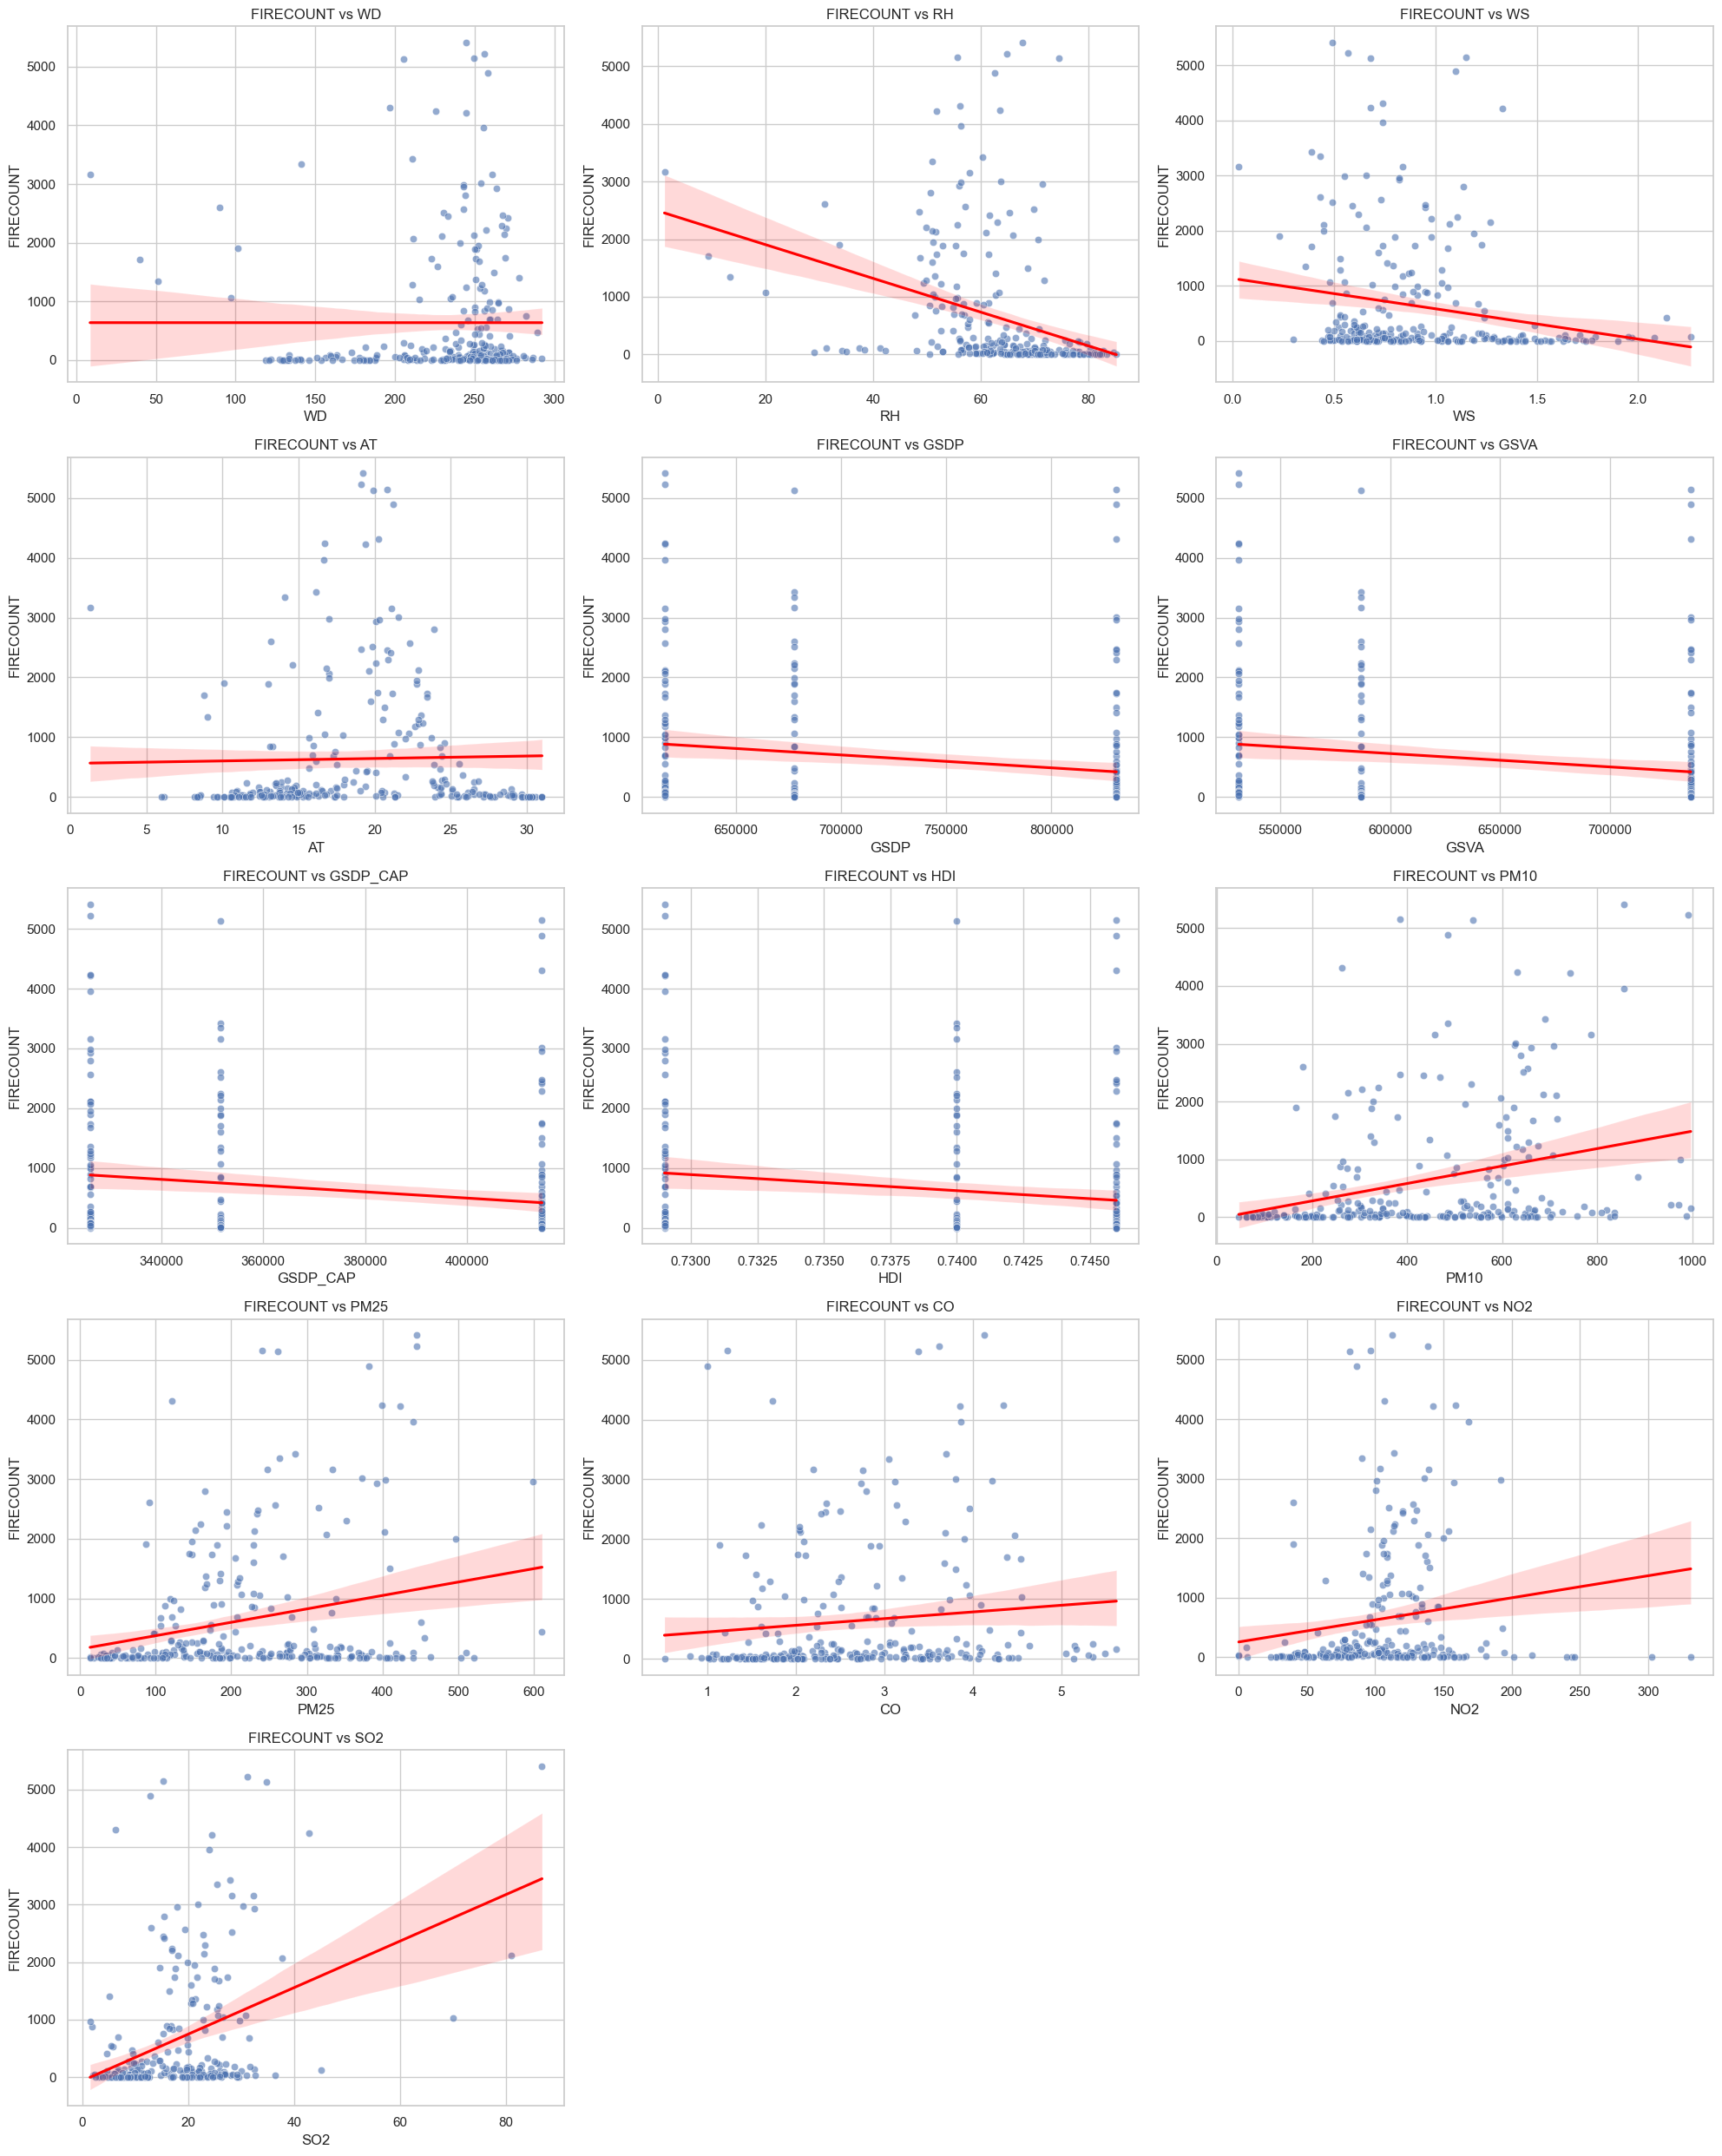

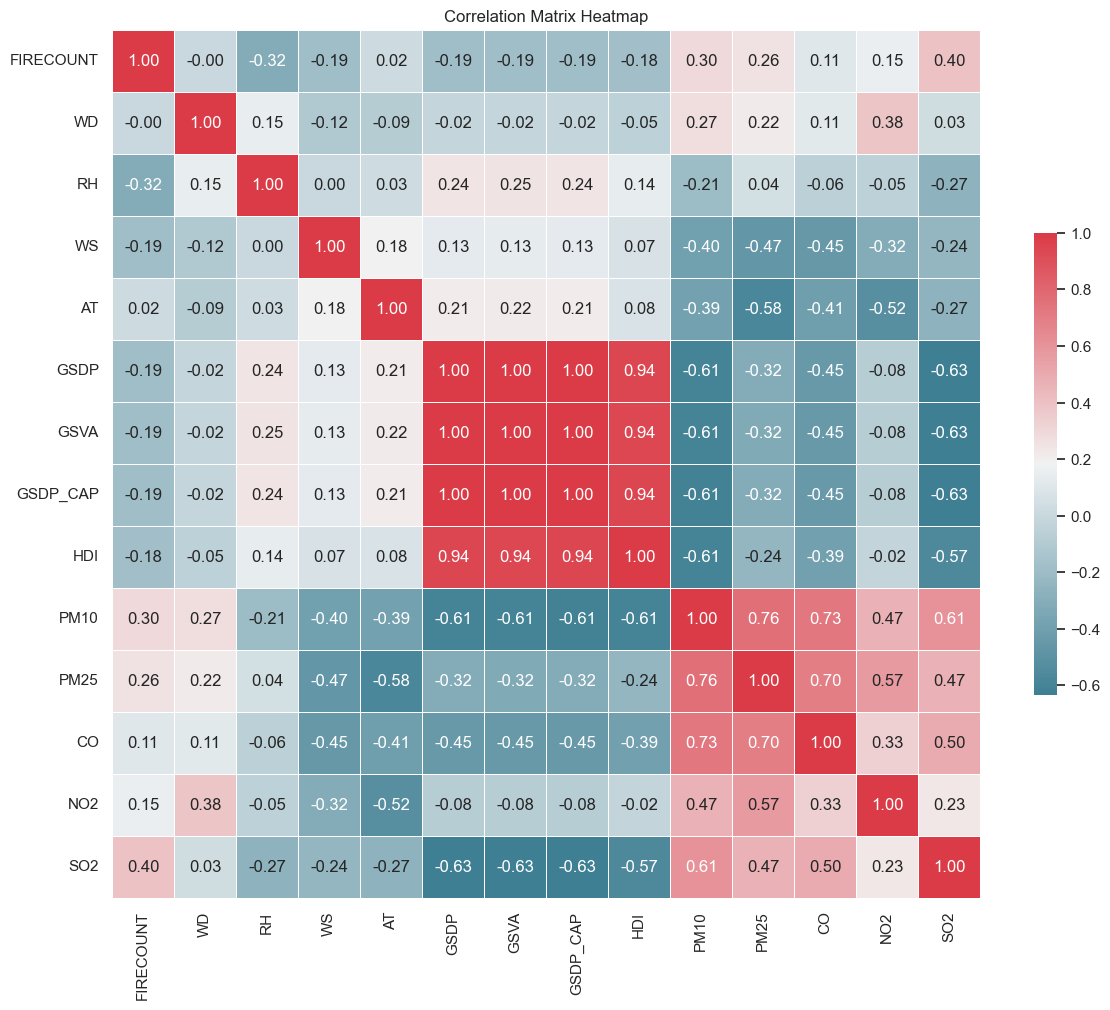

In [6]:
# 2012 t0 2021 without mean value 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('D:\stubble buring\stubble\STN1.csv')

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # Convert to datetime
    # Optionally, extract more date features
    # df['YEAR'] = df['DATE'].dt.year
    # df['MONTH'] = df['DATE'].dt.month

# Define relevant columns
relevant_columns = ['FIRECOUNT', 'WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
                    'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

# Drop rows with missing values in relevant columns
df = df.dropna(subset=relevant_columns)

# Ensure all relevant columns are numeric
for col in relevant_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any remaining rows with NaN values in relevant columns
df = df.dropna(subset=relevant_columns)

# Display cleaned data
print("Cleaned Data Preview:")
print(df[relevant_columns].head())




# Step 3: Calculate correlations
# Ensure all values are displayed without truncation
pd.set_option('display.max_rows',None)

# Now print the full Pearson Correlation Coefficients
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print('correlations')



# Step 4: Plot scatter plots
sns.set(style="whitegrid")

features = ['WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
            'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df, scatter=False, color='red')
    plt.title(f'FIRECOUNT vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

plt.tight_layout()
plt.show()

# Step 5: Correlation matrix heatmap
corr_matrix = df[relevant_columns].corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [4]:
# 2012 to 2021 with mean value 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path1 = 'STN1.csv'
df1 = pd.read_csv(file_path1)

# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(df1.head())

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df1.columns:
    df1['DATE'] = pd.to_datetime(df1['DATE'], errors='coerce')  # Convert to datetime
    # Optionally, extract more date features if needed
    # df1['YEAR'] = df1['DATE'].dt.year
    # df1['MONTH'] = df1['DATE'].dt.month

# Define relevant columns
relevant_columns = ['FIRECOUNT', 'WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 
                    'GSDP_CAP', 'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

# Ensure all relevant columns are present in the dataset
missing_columns = set(relevant_columns) - set(df1.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing in the dataset: {missing_columns}")

# Select only the relevant columns
df1_relevant = df1[relevant_columns]

# Step 3: Replace NaN values with zero
df1_cleaned = df1_relevant.fillna(0)

# Alternatively, if you want to replace NaNs with zero for all columns:
# df1_cleaned = df1.fillna(0)

# Display the cleaned data
print("\nCleaned Data Preview:")
print(df1_cleaned.head())

# Step 4: Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# Step 5: Calculate the mean value for each numeric column
mean_values_df1 = numeric_df1.mean()

# Step 6: Calculate the mode value for each numeric column
mode_values_df1 = numeric_df1.mode().iloc[0]

# Display the mean and mode values
print("\nMean values for Dataset 1:\n", mean_values_df1)
print("\nMode values for Dataset 1:\n", mode_values_df1)

# Step 7: Simple plotting method - Mean vs Mode for the dataset
plt.figure(figsize=(14, 7))

# Plot Mean values
plt.plot(mean_values_df1, label='Mean', marker='o', linestyle='-', color='blue')

# Plot Mode values
plt.plot(mode_values_df1, label='Mode', marker='x', linestyle='--', color='red')

# Add title and labels
plt.title('Mean vs Mode for Numeric Columns in Dataset 1')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

# Optional: Correlation Analysis and Scatter Plots

# Calculate Pearson correlation between FIRECOUNT and other features
correlations = df1_cleaned.corr()['FIRECOUNT'].drop('FIRECOUNT')  # Exclude self-correlation
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print(correlations)

# Plot scatter plots for FIRECOUNT vs each feature
sns.set(style="whitegrid")
features = ['WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
            'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df1_cleaned, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df1_cleaned, scatter=False, color='red')
    plt.title(f'FIRECOUNT vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

plt.tight_layout()
plt.show()

# Generate a Correlation Matrix Heatmap
corr_matrix = df1_cleaned.corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'STN1.csv'

Cleaned Data Preview:
     FIRECOUNT      WD     RH    WS     AT    GSDP      GSVA  GSDP_CAP    HDI  \
160        363  231.46  68.41  0.60  25.81  616085  531175.0    326005  0.729   
161        560  257.38  61.28  0.74  25.55  616085  531175.0    326005  0.729   
162        899  250.21  61.45  0.95  24.57  616085  531175.0    326005  0.729   
163        825  250.21  54.92  1.01  24.30  616085  531175.0    326005  0.729   
191       3959  255.36  56.35  0.74  16.63  616085  531175.0    326005  0.729   

       PM10    PM25    CO     NO2    SO2  
160  581.51  189.26  2.15   90.28  13.66  
161  575.38  172.77  2.63   95.96  19.77  
162  602.40  187.45  4.09   98.17  16.67  
163  571.81  133.47  3.64  105.13  23.08  
191  857.40  440.98  3.86  168.50  23.86  

Pearson Correlation Coefficients with FIRECOUNT:
DATE       -0.217800
WD         -0.063118
RH         -0.195650
WS         -0.100688
AT         -0.092055
GSDP       -0.200496
GSVA       -0.199349
GSDP_CAP   -0.200595
HDI        -0.2

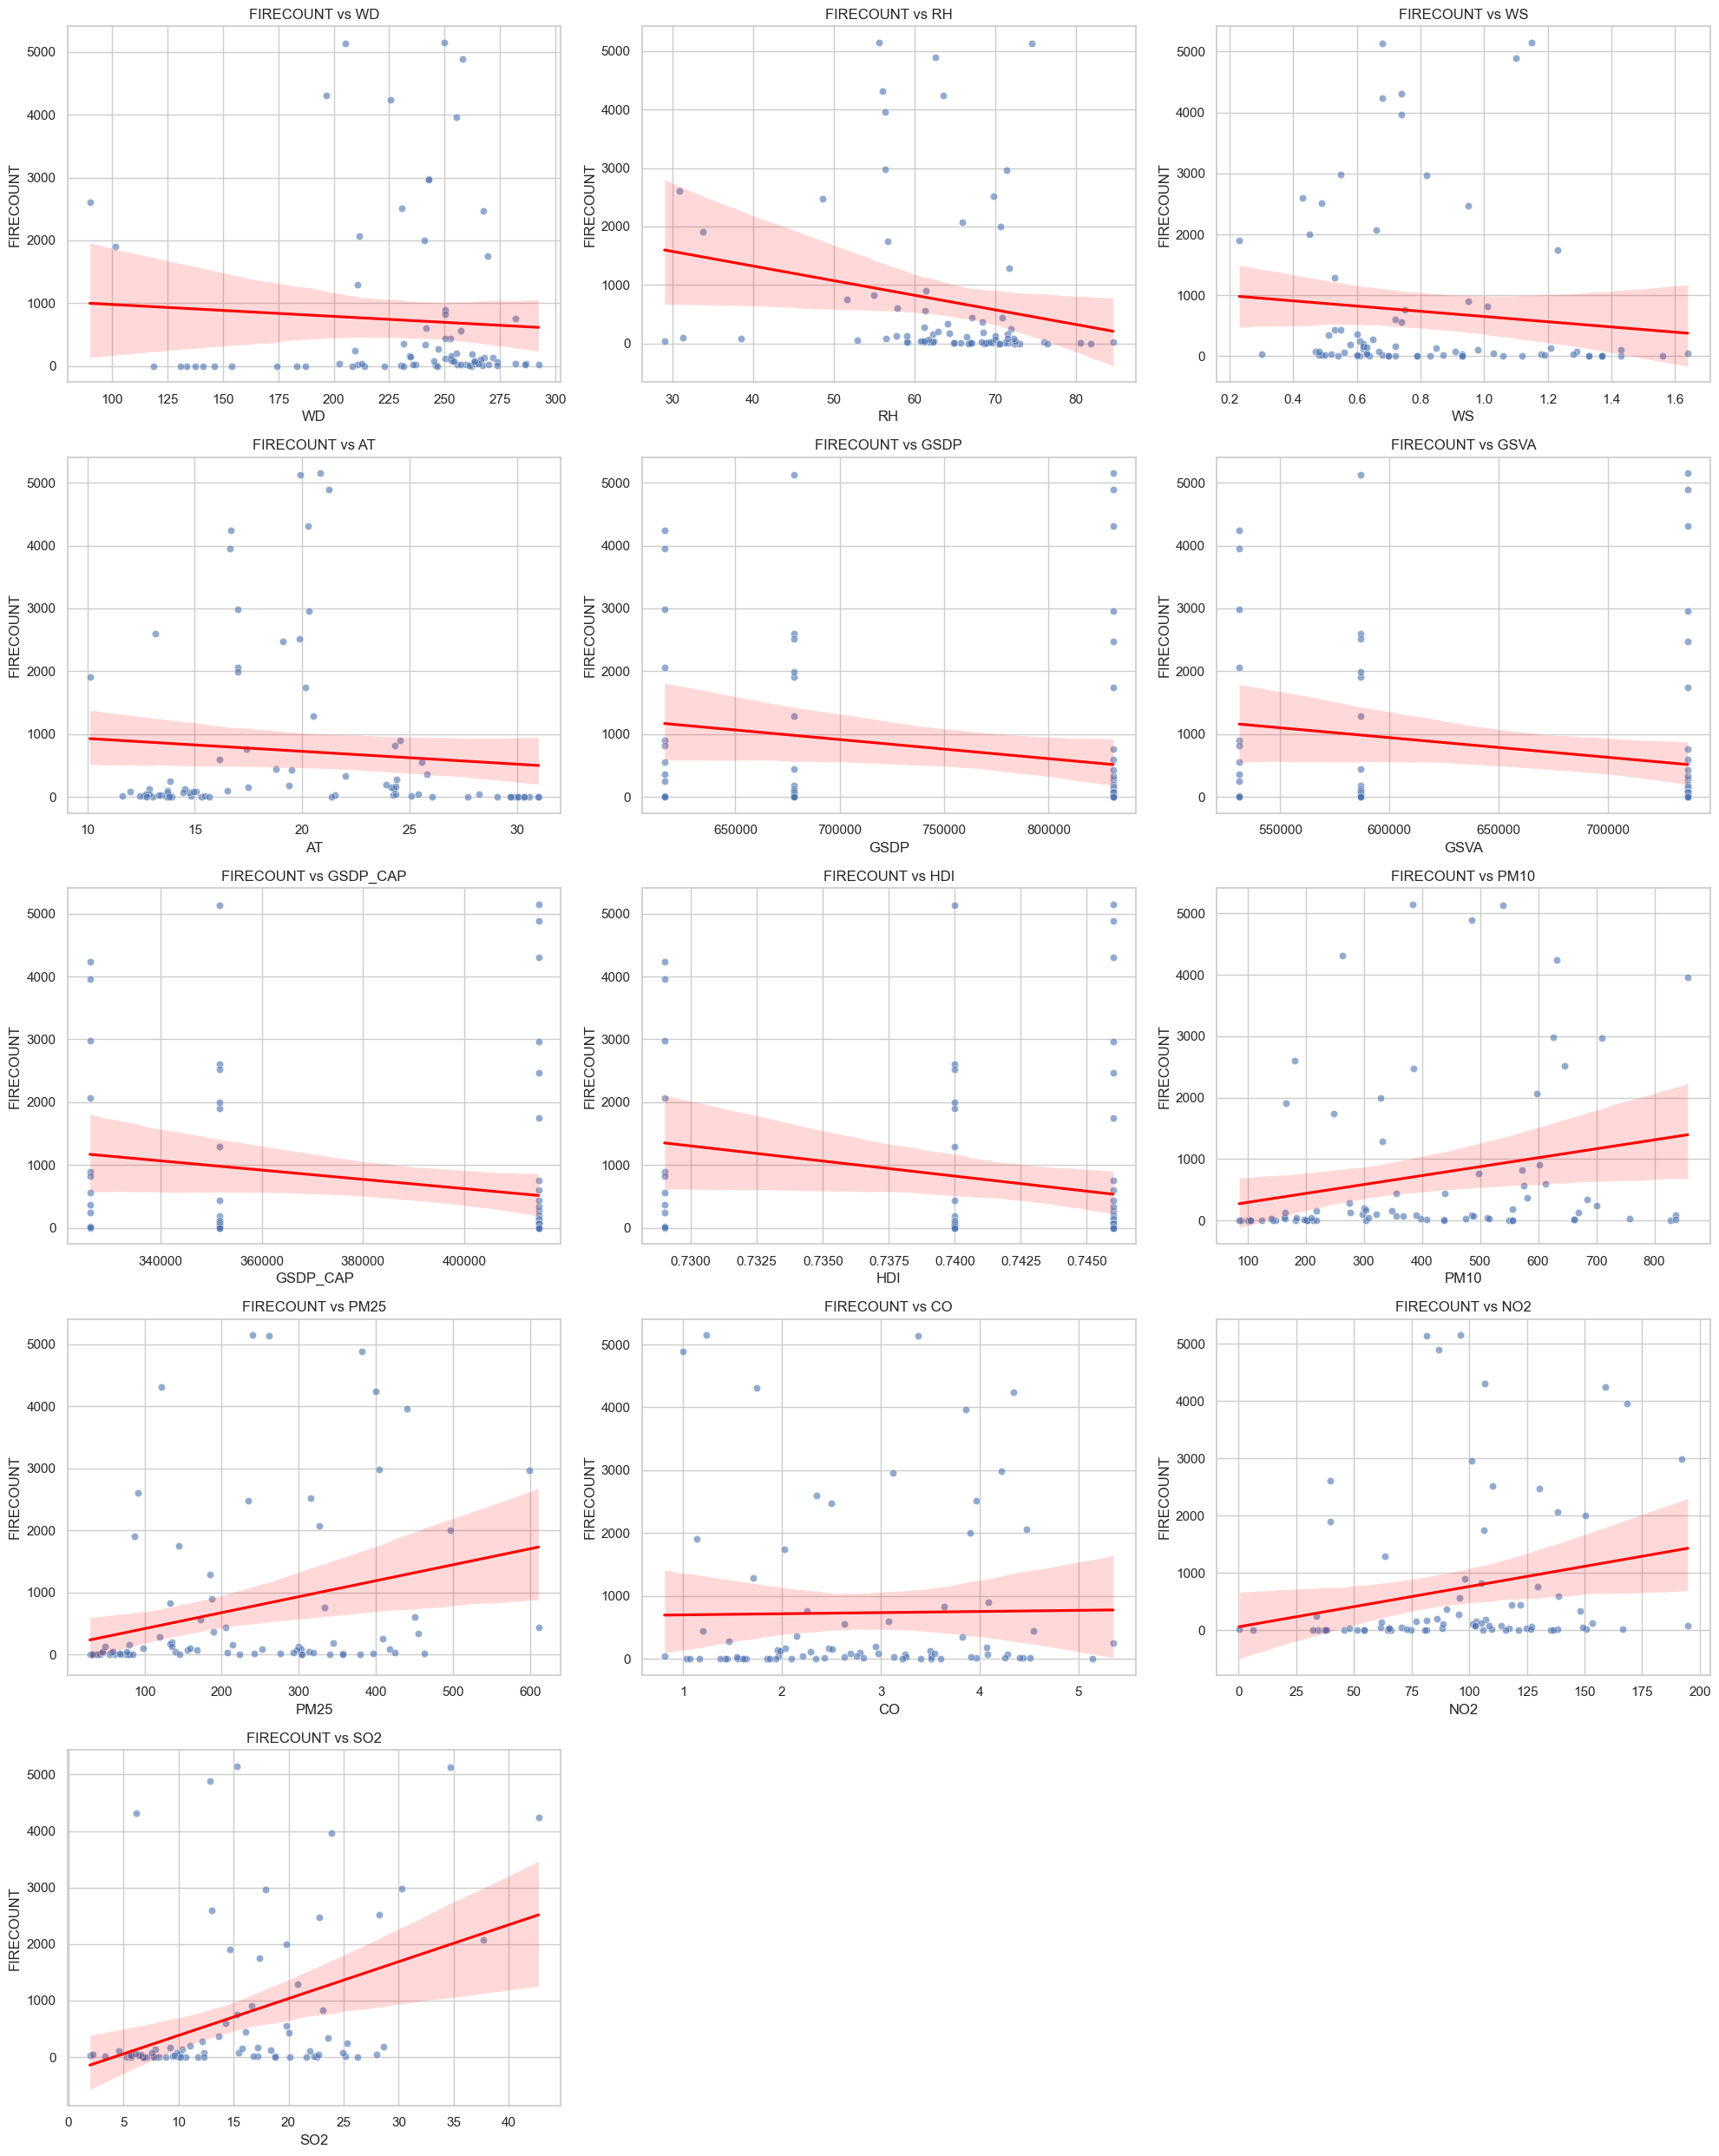

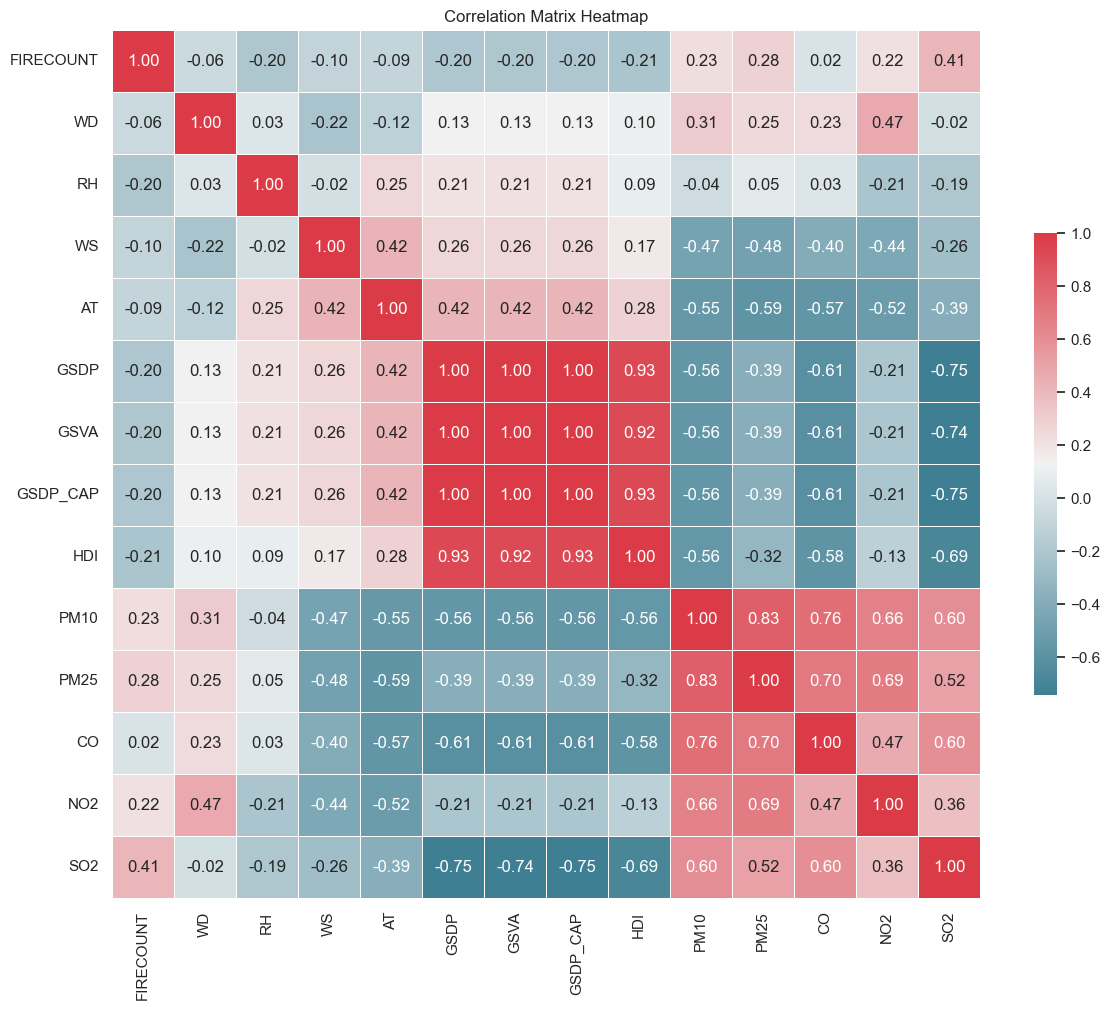

In [9]:
# 2016 to 2021 without mean value 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('STN1.csv')

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # Convert to datetime
    
    # Define the start and end date
    start_date = '2016-09-01'
    end_date = '2021-12-31'
    
    # Filter rows between the specified date range
    df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]


# Define relevant columns
relevant_columns = ['FIRECOUNT', 'WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
                    'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

# Drop rows with missing values in relevant columns
df = df.dropna(subset=relevant_columns)

# Ensure all relevant columns are numeric
for col in relevant_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any remaining rows with NaN values in relevant columns
df = df.dropna(subset=relevant_columns)

# Display cleaned data
print("Cleaned Data Preview:")
print(df[relevant_columns].head())

# Step 3: Calculate correlations
correlations = df.corr()['FIRECOUNT'].drop('FIRECOUNT')  # Exclude self-correlation
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print(correlations)

# Step 4: Plot scatter plots
sns.set(style="whitegrid")

features = ['WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
            'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df, scatter=False, color='red')
    plt.title(f'FIRECOUNT vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

plt.tight_layout()
plt.show()

# Step 5: Correlation matrix heatmap
corr_matrix = df[relevant_columns].corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()





Initial Data Preview:
         DATE  FIRECOUNT      WD     RH   WS     AT    GSDP      GSVA  \
0  01-09-2012          1  145.88  66.12  0.3  30.49  391388  342588.0   
1  02-09-2012          1  145.34  76.03  0.3  27.55  391388  342588.0   
2  03-09-2012          1  100.51  71.75  0.3  27.73  391388  342588.0   
3  04-09-2012          1   85.88  71.89  0.3  27.76  391388  342588.0   
4  05-09-2012          6   87.98  65.94  0.3  28.43  391388  342588.0   

   GSDP_CAP    HDI  PM10    PM25    CO    NO2    SO2  
0    225117  0.713   NaN  114.62  1.84  96.74  24.74  
1    225117  0.713   NaN  131.78  1.63  98.00  11.47  
2    225117  0.713   NaN   33.57  0.86  51.49   8.96  
3    225117  0.713   NaN   44.01  1.38  55.36   8.63  
4    225117  0.713   NaN   28.14  1.11  45.59   8.64  

Cleaned Data Preview:
     FIRECOUNT      WD     RH   WS     AT    GSDP      GSVA  GSDP_CAP    HDI  \
130          8    0.00   0.00  0.0   0.00  616085  531175.0    326005  0.729   
131          3    0.00   0

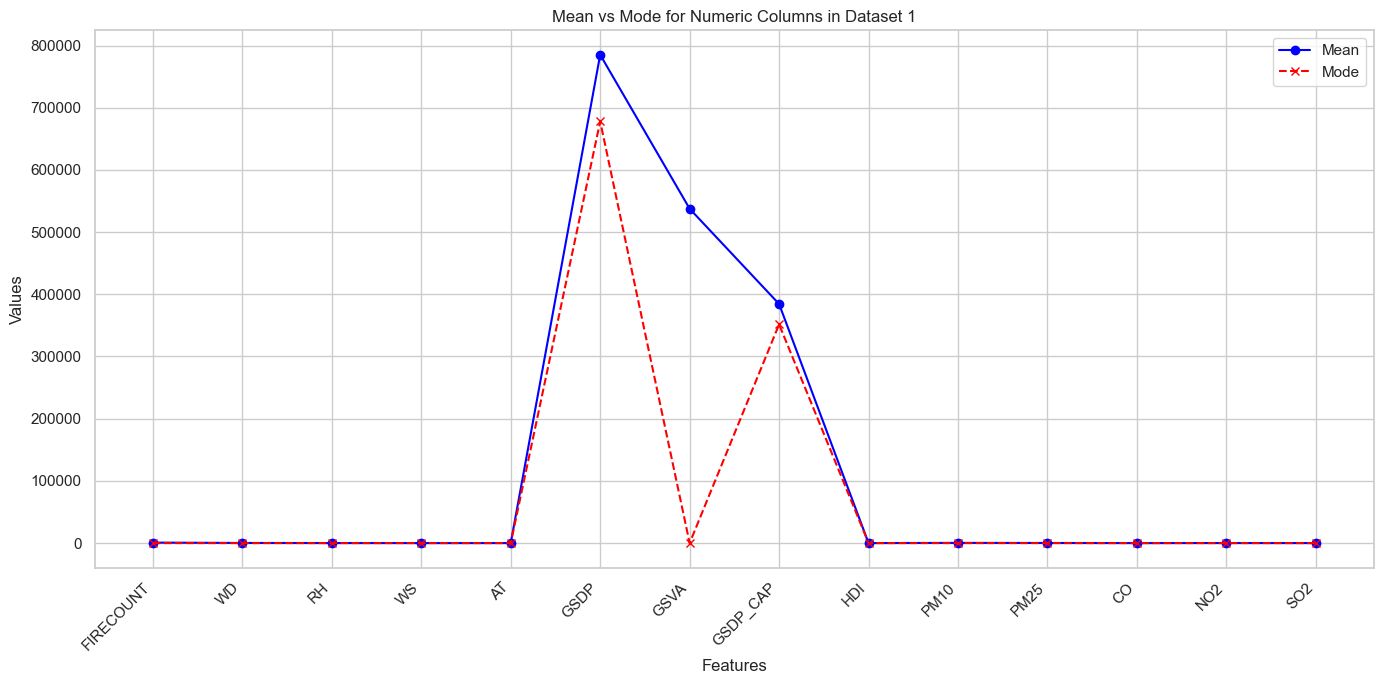


Pearson Correlation Coefficients with FIRECOUNT:
WD          0.095598
RH         -0.156740
WS         -0.184292
AT         -0.030610
GSDP        0.086841
GSVA       -0.110158
GSDP_CAP    0.028027
HDI        -0.140159
PM10        0.444087
PM25        0.433545
CO          0.285236
NO2         0.455221
SO2         0.234187
Name: FIRECOUNT, dtype: float64


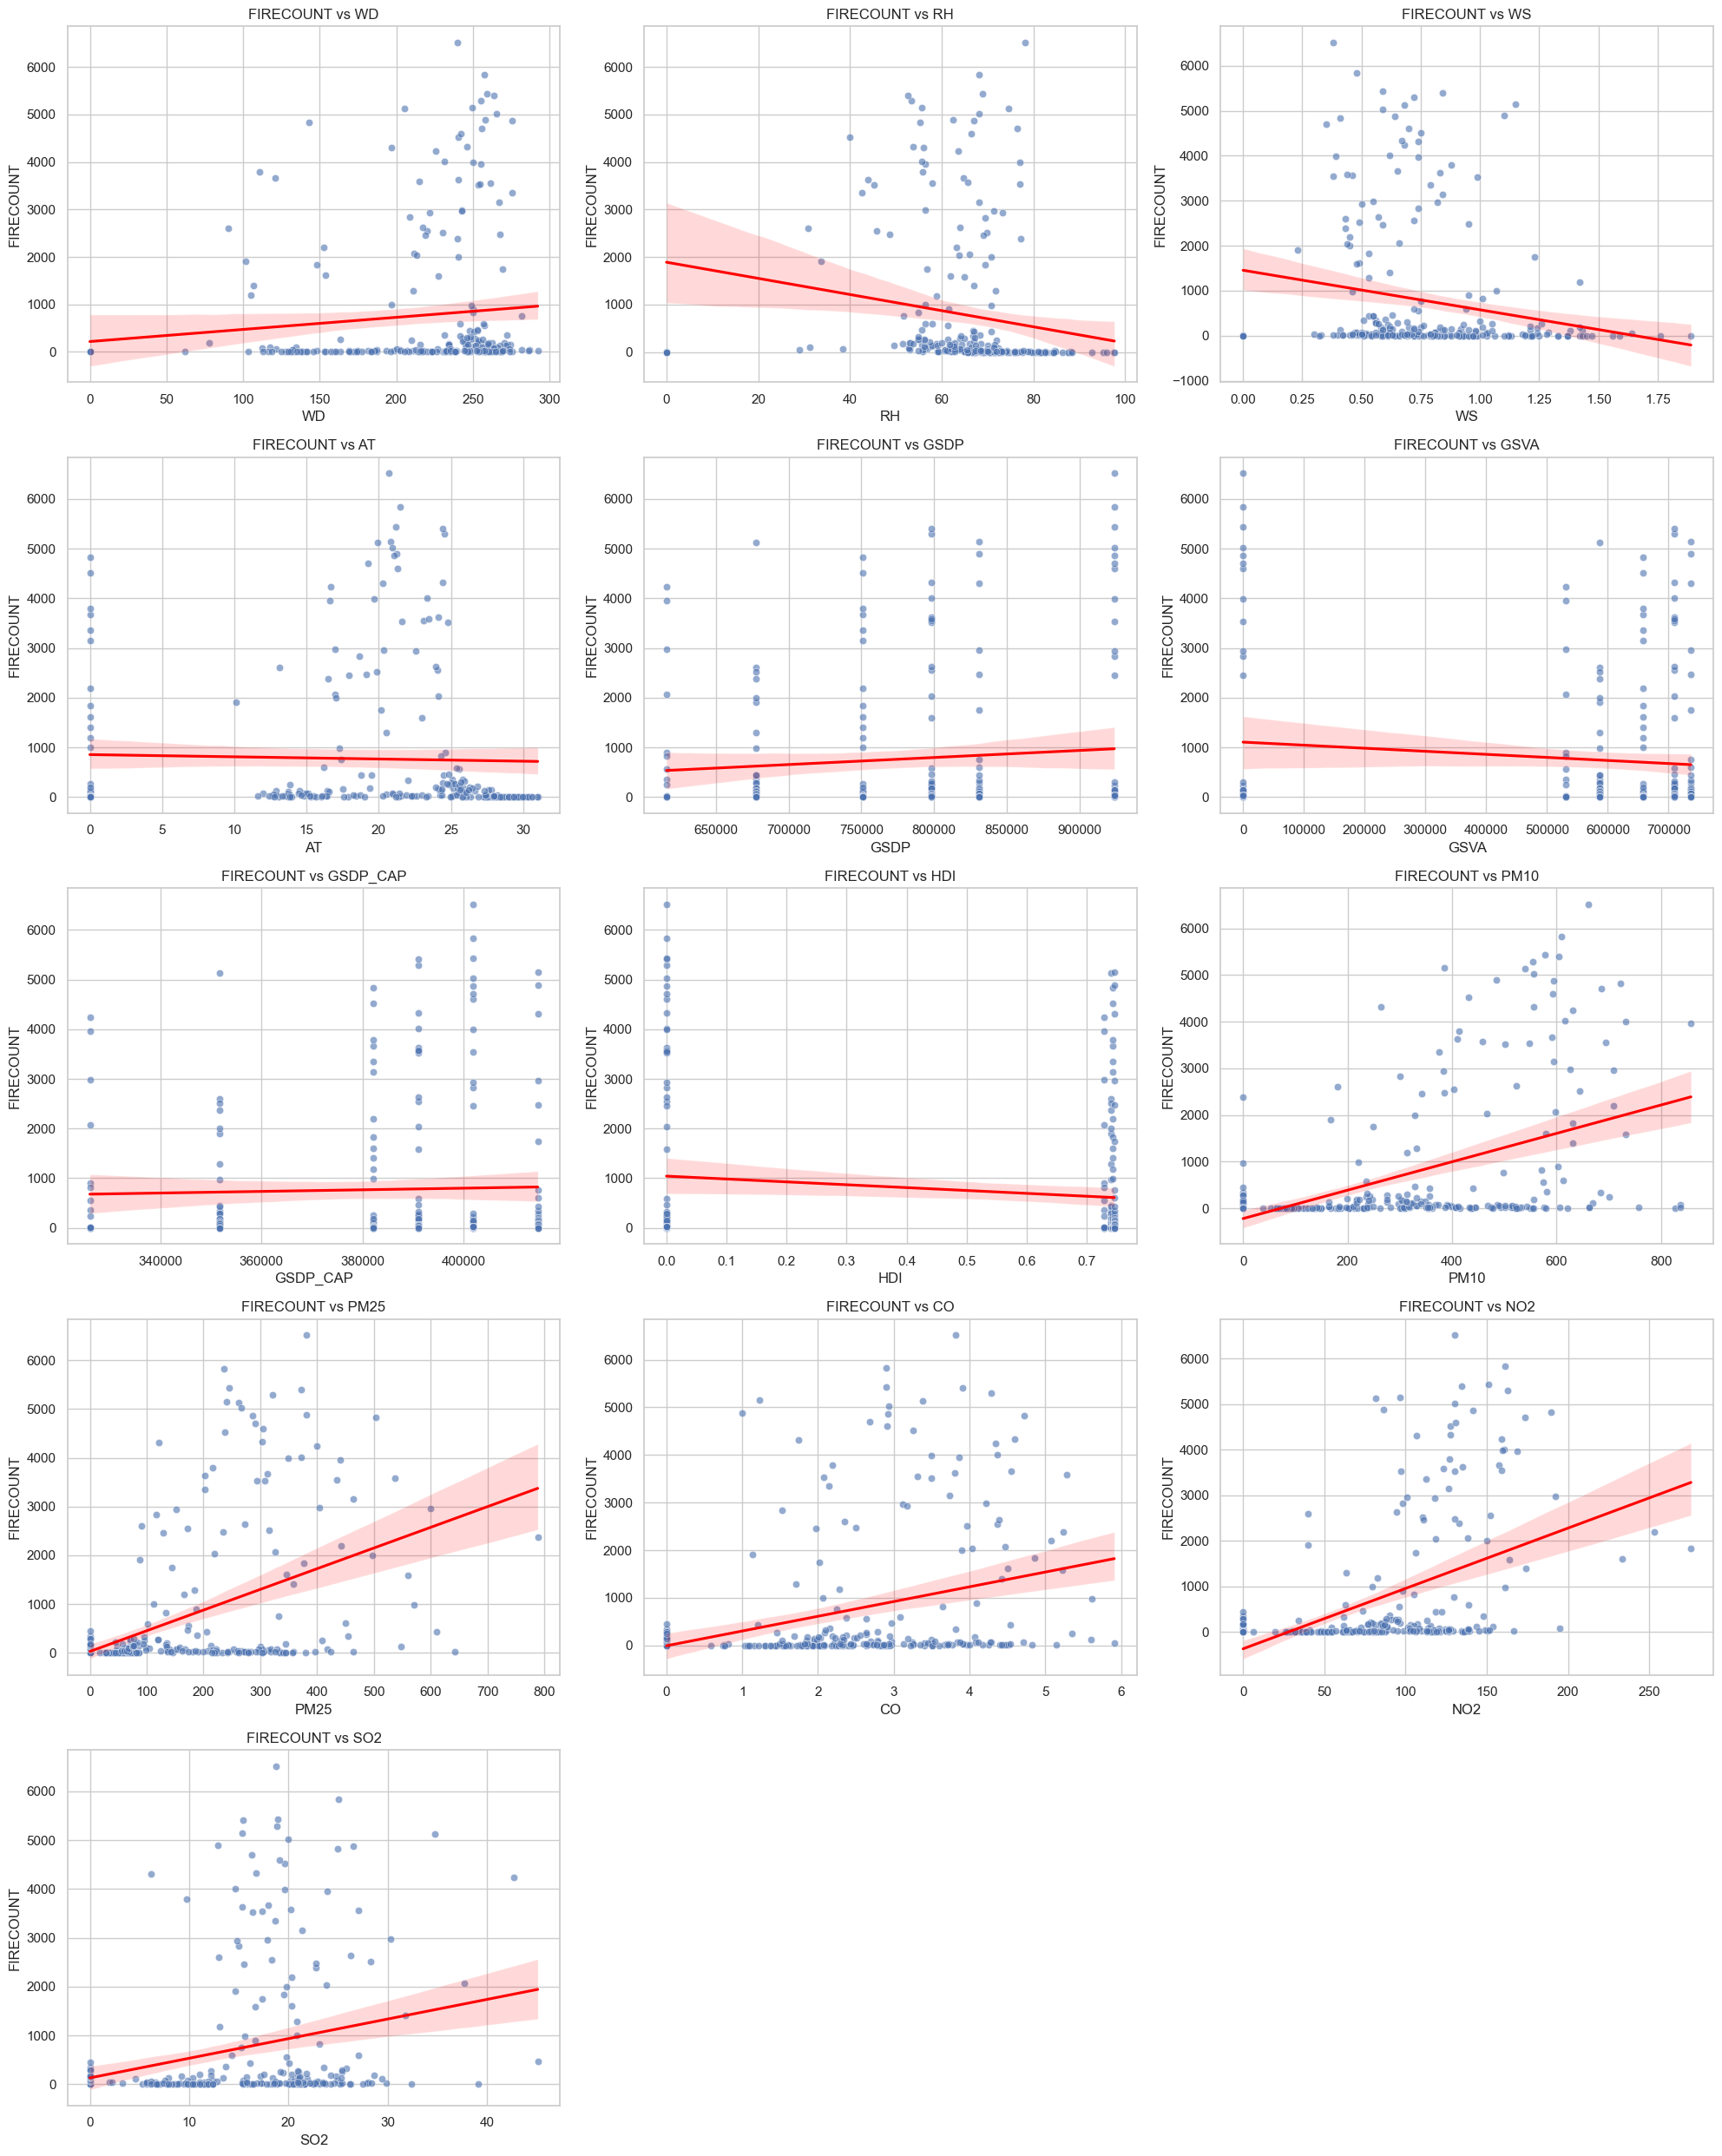

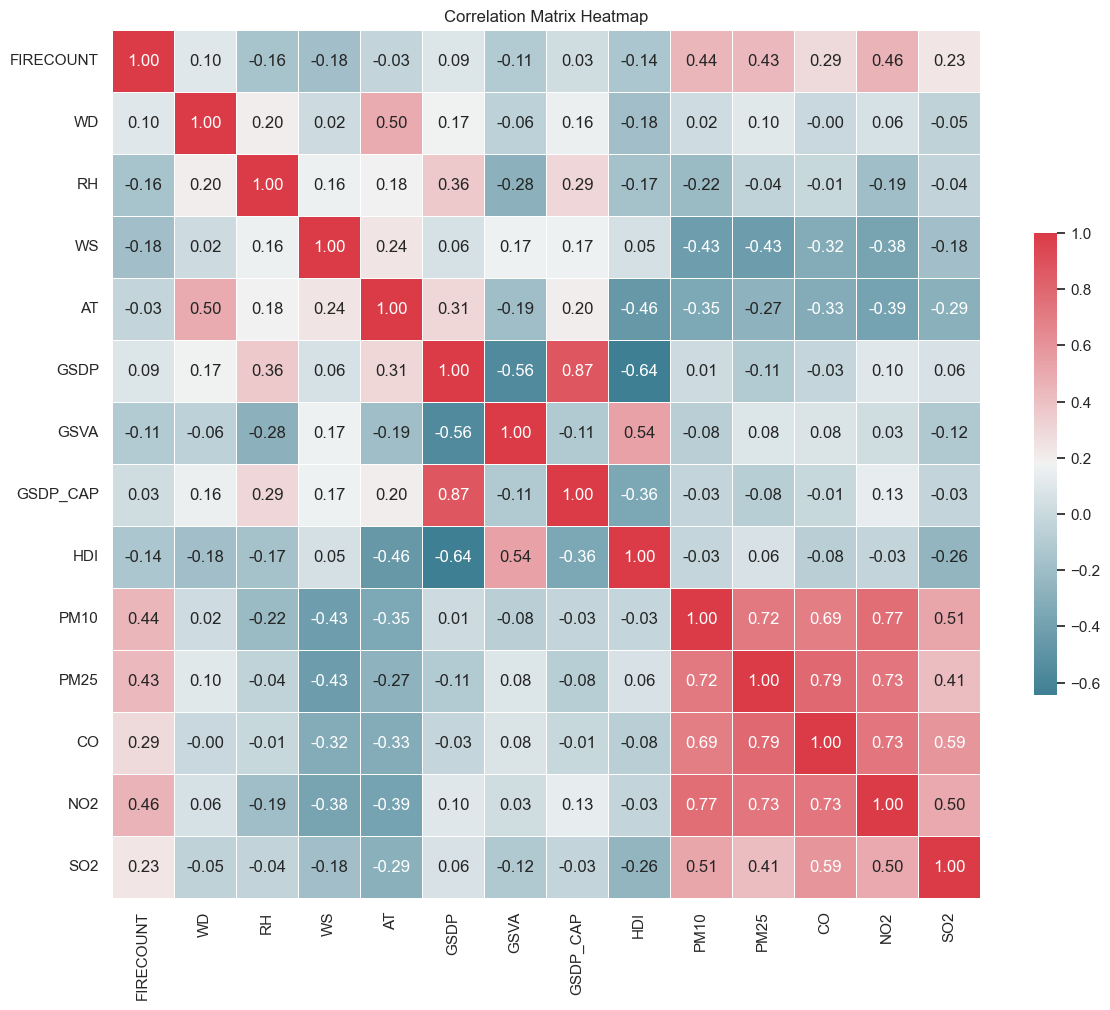

In [10]:
# 2016 to 2012 with mean value 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path1 = 'STN1.csv'
df1 = pd.read_csv(file_path1)

# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(df1.head())

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df1.columns:
    df1['DATE'] = pd.to_datetime(df1['DATE'], errors='coerce')  # Convert to datetime
    
    # Define the date range for filtering (from 01-09-2016 to 31-12-2021)
    start_date = '2016-09-01'
    end_date = '2021-12-31'
    
    # Filter the dataset for the specified date range
    df1 = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]

# Define relevant columns
relevant_columns = ['FIRECOUNT', 'WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 
                    'GSDP_CAP', 'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

# Ensure all relevant columns are present in the dataset
missing_columns = set(relevant_columns) - set(df1.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing in the dataset: {missing_columns}")

# Step 3: Select only the relevant columns
df1_relevant = df1[relevant_columns]

# Step 4: Replace NaN values with zero
df1_cleaned = df1_relevant.fillna(0)

# Display the cleaned data
print("\nCleaned Data Preview:")
print(df1_cleaned.head())

# Step 5: Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# Step 6: Calculate the mean value for each numeric column
mean_values_df1 = numeric_df1.mean()

# Step 7: Calculate the mode value for each numeric column
mode_values_df1 = numeric_df1.mode().iloc[0]

# Display the mean and mode values
print("\nMean values for Dataset 1:\n", mean_values_df1)
print("\nMode values for Dataset 1:\n", mode_values_df1)

# Step 8: Simple plotting method - Mean vs Mode for the dataset
plt.figure(figsize=(14, 7))

# Plot Mean values
plt.plot(mean_values_df1, label='Mean', marker='o', linestyle='-', color='blue')

# Plot Mode values
plt.plot(mode_values_df1, label='Mode', marker='x', linestyle='--', color='red')

# Add title and labels
plt.title('Mean vs Mode for Numeric Columns in Dataset 1')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

# Step 9: Correlation Analysis

# Calculate Pearson correlation between FIRECOUNT and other features
correlations = df1_cleaned.corr()['FIRECOUNT'].drop('FIRECOUNT')  # Exclude self-correlation
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print(correlations)

# Plot scatter plots for FIRECOUNT vs each feature
sns.set(style="whitegrid")
features = ['WD', 'RH', 'WS', 'AT', 'GSDP', 'GSVA', 'GSDP_CAP', 
            'HDI', 'PM10', 'PM25', 'CO', 'NO2', 'SO2']

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df1_cleaned, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df1_cleaned, scatter=False, color='red')
    plt.title(f'FIRECOUNT vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

plt.tight_layout()
plt.show()

# Step 10: Correlation Matrix Heatmap
corr_matrix = df1_cleaned.corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()
